# K-MEANS  ALGORITHM

* K-Means ia an unsupervised machine Learning algorithm.
* It is used to group the data points into clusters
* similar data from the same cluster
* K values are number of clusters

## USE CASE :
* we are analysing and spending score using K-Means Algorithm
* Which helps to grroups the clusters based on similar data points

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.shape

(200, 5)

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score '], dtype='object')

In [4]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score,0


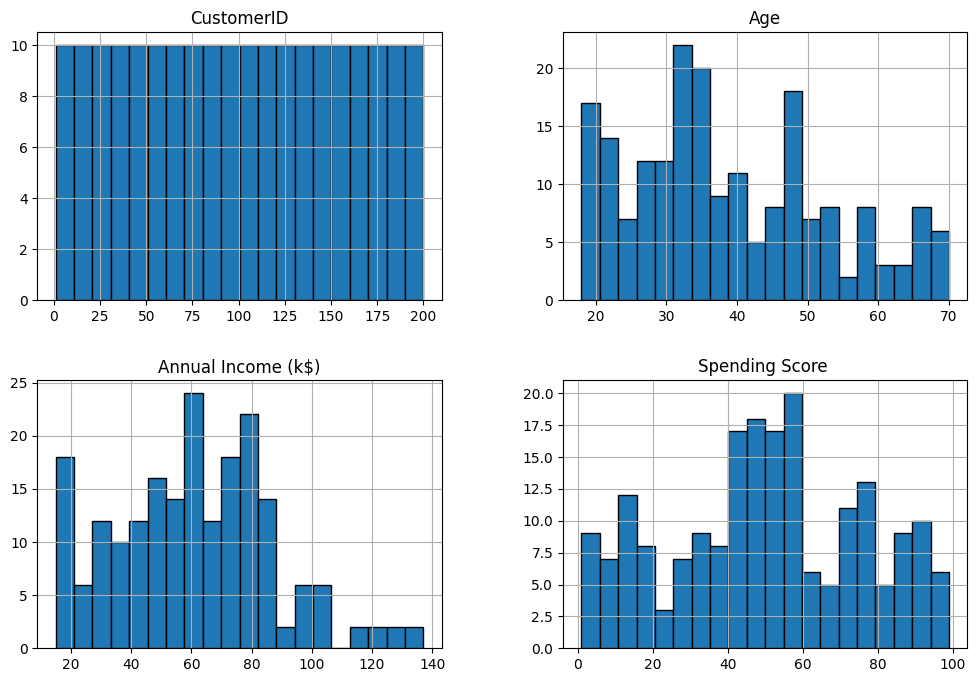

In [5]:
df.hist(bins=20, figsize=(12,8),edgecolor="Black")
plt.show()

In [6]:
df=df.rename(columns={'Annual Income (k$)': "Annual Income"})
df.set_index("CustomerID", inplace=True)
df

,Gender,Age,Annual Income,Spending Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [7]:
df.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score '], dtype='object')

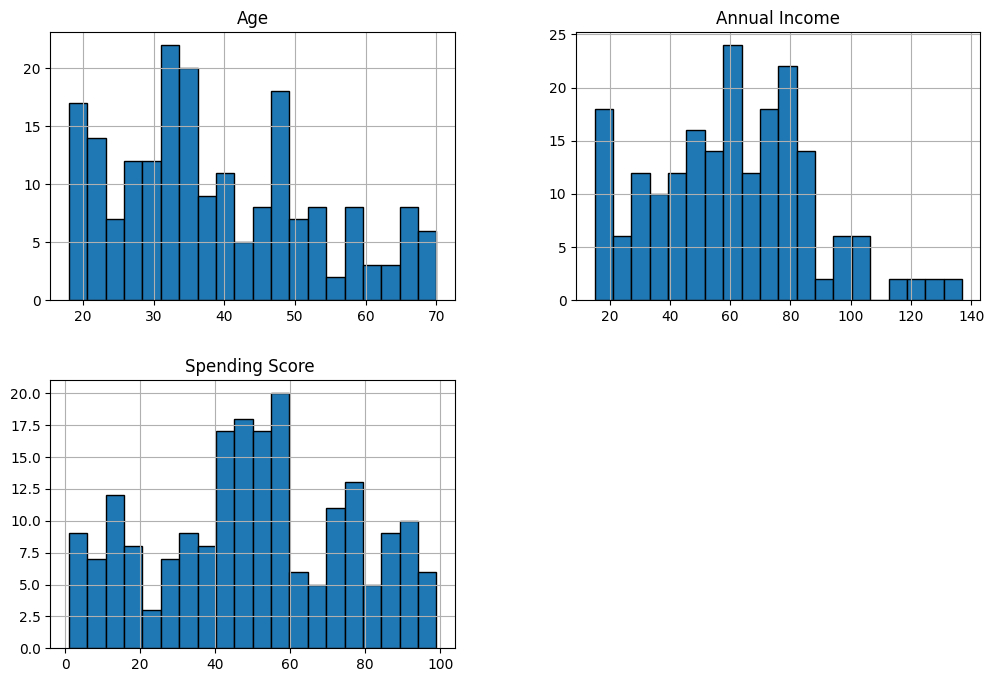

In [8]:
df.hist(bins=20,edgecolor="Black",figsize=(12,8))
plt.show()

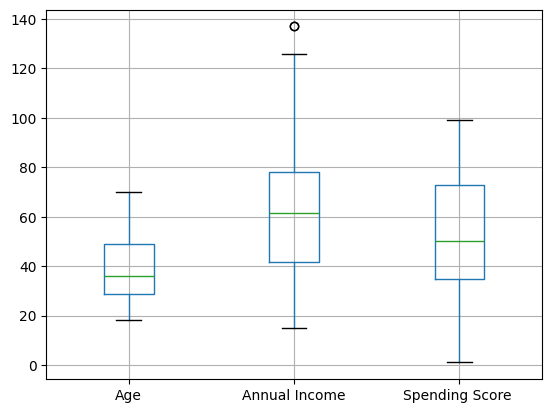

In [9]:
df.boxplot()
plt.show()

In [10]:
x=df.iloc[:,[2,3]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [17]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

In [18]:
kmeans=KMeans(n_clusters=5,init="k-means++",random_state=42)
y_kmeans=kmeans.fit_predict(x)
y_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

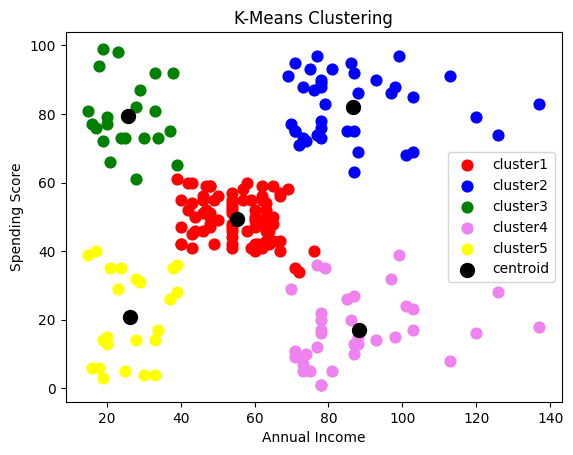

In [19]:
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=60,c="red",label="cluster1")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=60,c="blue",label="cluster2")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=60,c="green",label="cluster3")
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=60,c="violet",label="cluster4")
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=60,c="yellow",label="cluster5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="black",label="centroid")
plt.title("K-Means Clustering")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()